# Imports

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt

# Funções

In [2]:
def testa_df (previsao, gabarito):
    # Labels verdadeiros e gerados pelo modelo
    true_labels = gabarito['Class']  # Supondo que 'Class' contém os clusters corretos
    predicted_labels = previsao  # Clusters gerados pelo modelo
    
    # Calculando o ARI
    ari_score = adjusted_rand_score(true_labels, predicted_labels)
    print(f"Ajusted Rand Index: {ari_score}")
    nmi_score = normalized_mutual_info_score(true_labels, predicted_labels)
    print(f"Normalized Mutual Information: {nmi_score}")

In [3]:
def cotovelo (df):
    # Determinar o número ideal de clusters (opcional)
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    
    # Plotando o "cotovelo"
    plt.plot(range(1, 10), inertia, marker='o')
    plt.title("Método do Cotovelo")
    plt.xlabel("Número de Clusters")
    plt.ylabel("Inércia")
    plt.show()

In [51]:
def my_kmeans (df, k):
    # Aplicar o modelo com o número ideal de clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df)
    
    print(f"Inércia: {kmeans.inertia_}")
    sil_score = silhouette_score(df, kmeans.labels_)
    print(f"Silhouette Score: {sil_score}")
    
    # Adicionar os clusters ao dataset original
    df['Cluster'] = clusters

In [5]:
def my_scaler(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])

In [30]:
def my_encoder(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        df[col] = encoder.fit_transform(df[col])

# Lendo dataset

In [46]:
df = pd.read_csv("ObesityDataSet_2.csv")
df.columns
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Tratando dataset

In [47]:
df_processed_1 = df.drop("NObeyesdad", axis=1)
my_scaler(df_processed_1, ["Age", "Height", "Weight"])
my_encoder(df_processed_1, ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"])
category_order = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df_processed_1['CAEC'] = df['CAEC'].map(category_order)
df_processed_1['CALC'] = df['CALC'].map(category_order)
df_processed_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,-0.522124,-0.875589,-0.862558,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3
1,0,-0.522124,-1.947599,-1.168077,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3
2,1,-0.206889,1.054029,-0.366090,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3
3,1,0.423582,1.054029,0.015808,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4
4,1,-0.364507,0.839627,0.122740,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3


In [48]:
distinct_values = df_processed_1['CALC'].unique()
print(distinct_values)

[0 1 2 3]


# Aplicando KMEANS no dataset todo

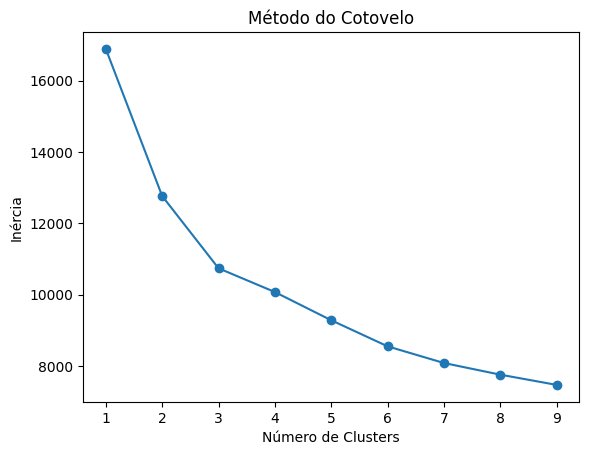

In [49]:
cotovelo(df_processed_1)

In [67]:
my_kmeans(df_processed_1, 5)

Inércia: 9257.49516341481
Silhouette Score: 0.2762460034750491


In [153]:
testa_df(df_processed_1["Cluster"], df)

Ajusted Rand Index: 0.13899450936163982
Normalized Mutual Information: 0.15269082450788884


# Aplicando KMEANS no dataset filtrado a partir da matriz de correlação

## Corte de correlação mínima de 20%

In [244]:
class_corr = corr_matrix['Class']
limite = 0.2
selected_columns = class_corr[abs(class_corr) >= limite].index

In [245]:
selected_columns

Index(['Sex', 'Age', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
       'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
       'Calculation_of_Calorie_Intake', 'Physical_Excercise',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

In [246]:
df_processed_2 = df[selected_columns]
df_processed_2 = df_processed_2.drop("Class", axis=1)
df_processed_2.head()

,Sex,Age,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Type_of_Transportation_Used
0,2,18,2,2,3,1,2,3,4
1,2,18,2,2,3,1,2,1,3
2,2,18,2,2,2,1,2,2,4
3,2,18,2,2,2,2,2,1,4
4,2,18,2,1,2,1,2,3,2


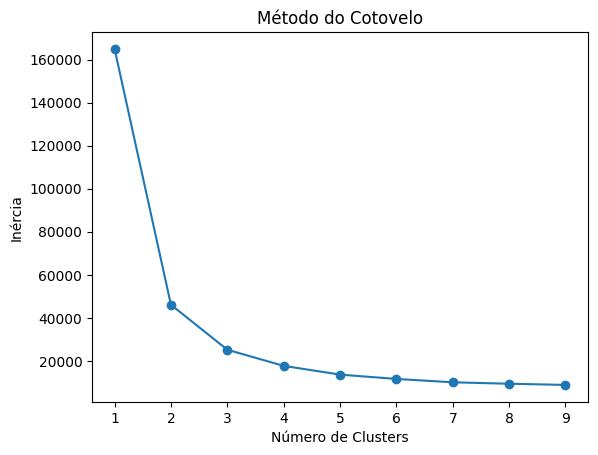

In [247]:
cotovelo(df_processed_2)

In [251]:
my_kmeans(df_processed_2, 4)
testa_df(df_processed_2["Cluster"], df)

Inércia: 20645.96875096139
Silhouette Score: 0.0338907452313372
Ajusted Rand Index: 0.18929107590096586
Normalized Mutual Information: 0.18656882057277108


## Corte de correlação mínima de 38.9%

In [252]:
limite = 0.389
selected_columns = class_corr[abs(class_corr) >= limite].index
selected_columns

Index(['Age', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Physical_Excercise', 'Class'],
      dtype='object')

In [253]:
df_processed_3 = df[selected_columns]
df_processed_3 = df_processed_3.drop("Class", axis=1)
df_processed_3.head()

,Age,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Physical_Excercise
0,18,3,1,3
1,18,3,1,1
2,18,2,1,2
3,18,2,2,1
4,18,2,1,3


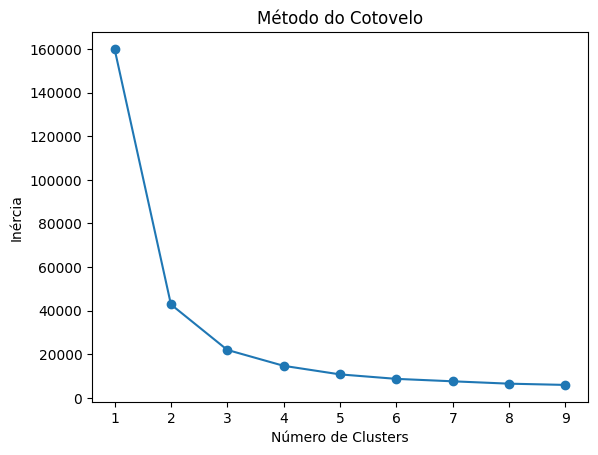

In [254]:
cotovelo(df_processed_3)

In [257]:
my_kmeans(df_processed_3, 4)
testa_df(df_processed_3["Cluster"], df)

Inércia: 16817.08597758014
Silhouette Score: 0.029952349668806954
Ajusted Rand Index: 0.16977923801368913
Normalized Mutual Information: 0.20915976079344514


## Corte de correlação mínima de 50%

In [258]:
limite = 0.5
selected_columns = class_corr[abs(class_corr) >= limite].index
selected_columns

Index(['Age', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Class'],
      dtype='object')

In [259]:
df_processed_4 = df[selected_columns]
df_processed_4 = df_processed_4.drop("Class", axis=1)
df_processed_4.head()

,Age,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily
0,18,3,1
1,18,3,1
2,18,2,1
3,18,2,2
4,18,2,1


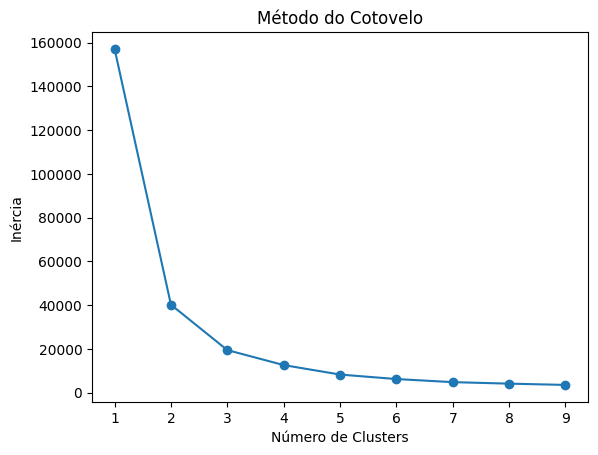

In [260]:
cotovelo(df_processed_4)

In [261]:
my_kmeans(df_processed_4, 4)
testa_df(df_processed_4["Cluster"], df)

Inércia: 12571.632741307392
Silhouette Score: 0.02799815479238143
Ajusted Rand Index: 0.16805022163019767
Normalized Mutual Information: 0.20671041944026416


# Aplicando standardScaler e hot_encoder no dataset

## No dataset inteiro

In [277]:
df_processed_5 = df.drop("Class", axis=1)

In [278]:
df_processed_5.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2


In [279]:
my_scaler(df_processed_5, ["Age", "Height"])

In [280]:
df_processed_5.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used
0,2,-1.537377,-1.597215,2,2,3,1,3,2,1,2,3,3,4
1,2,-1.537377,-1.221152,2,2,3,1,1,2,1,2,1,3,3
2,2,-1.537377,-1.095798,2,2,2,1,3,2,3,2,2,3,4
3,2,-1.537377,-0.719736,2,2,2,2,2,2,2,2,1,3,4
4,2,-1.537377,-0.343673,2,1,2,1,3,2,1,2,3,3,2


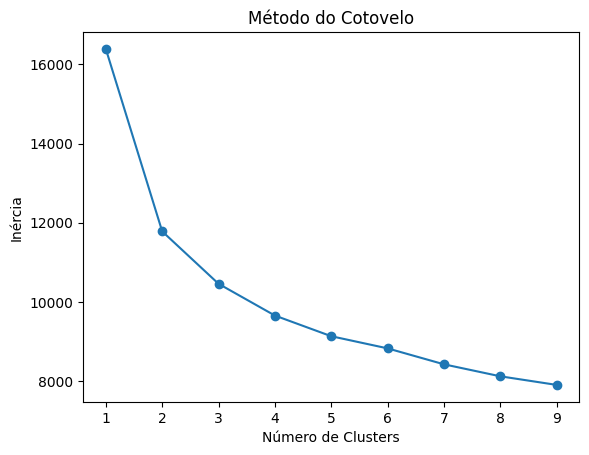

In [281]:
cotovelo(df_processed_5)

In [282]:
my_kmeans(df_processed_5, 4)
testa_df(df_processed_5["Cluster"], df)

Inércia: 9656.337100498202
Silhouette Score: 0.16339895677250352
Ajusted Rand Index: 0.1354352925503728
Normalized Mutual Information: 0.14564878412371315


## Com corte de 38.9% de correlação

In [268]:
df_processed_6 = df_processed_3.drop("Cluster", axis=1)
df_processed_6.head()

,Age,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Physical_Excercise
0,18,3,1,3
1,18,3,1,1
2,18,2,1,2
3,18,2,2,1
4,18,2,1,3


In [269]:
my_scaler(df_processed_6, ["Age"])

In [270]:
df_processed_6.head()

,Age,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Physical_Excercise
0,-1.537377,3,1,3
1,-1.537377,3,1,1
2,-1.537377,2,1,2
3,-1.537377,2,2,1
4,-1.537377,2,1,3


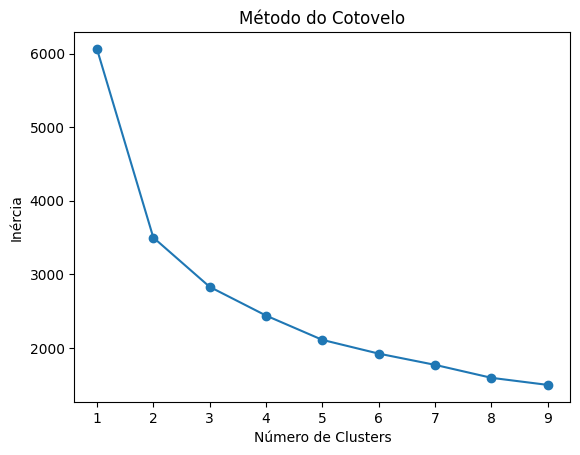

In [271]:
cotovelo(df_processed_6)

In [272]:
my_kmeans(df_processed_6, 4)
testa_df(df_processed_6["Cluster"], df)

Inércia: 2439.937869894786
Silhouette Score: 0.045525897082460735
Ajusted Rand Index: 0.12540769553556588
Normalized Mutual Information: 0.18199456292535485
